In [67]:
import typing
import os
import os.path as op
import anaconfig

from Preprocessing.preprocessing import load_dataframes

from utils.plotutils.plotconfig import configure_matplotlib
from utils.commonutils.cfeatures import get_unnormalised_features
from utils.commonutils.config import (
    get_pipeline_config_path,cdirs, load_config, resolve_config_paths
)
from tqdm.auto import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

import scipy.sparse as sps


configure_matplotlib()

In [68]:
partition = "minbias-sim10b-xdigi_v2.4_1498"
experiment_name = "scifi-3-xuvx"

config_path = get_pipeline_config_path(experiment_name)
config = load_config(config_path)
data_experiment_dir = op.join(
    cdirs.data_directory, config["common"]["experiment_name"]
)

In [69]:
indir = op.join(data_experiment_dir, "metric_learning_processed", "train")

In [104]:
for filename in tqdm(os.listdir(indir)[117:118]):
    path = os.path.join(indir, filename)
    batch = torch.load(path, map_location="cpu")


  0%|          | 0/1 [00:00<?, ?it/s]

In [105]:
batch["plane"][batch["edge_index"]]

tensor([[ 0,  0,  0,  ...,  8,  8,  8],
        [ 3,  3,  3,  ..., 11, 11, 11]])

In [106]:
edge_index = batch["edge_index"].numpy()

In [107]:
df_hits_particles = pd.read_parquet(
    batch.truncated_path + "-hits_particles.parquet",
)
df_particles = pd.read_parquet(
    batch.truncated_path + "-particles.parquet",
)
df_hits_particles = df_hits_particles.merge(
    df_particles[["particle_id", "pid", "nhits_velo", "has_scifi"]],
    on="particle_id",
    how="left",
)


In [108]:
df_hits_particles = df_hits_particles.merge(
    pd.DataFrame(
        {
            "hit_id": batch.hit_id,
            "hit_idx": np.arange(batch.hit_id.shape[0]),
        },                
    ),
    how="left",
    on=["hit_id"],
)

In [109]:
particle_ids = df_hits_particles[df_hits_particles["particle_id"] != 0]["particle_id"].unique()
np.random.shuffle(particle_ids)


In [110]:
array_xatyeq0 = batch["xatyeq0"].numpy()
array_zatyeq0 = batch["zatyeq0"].numpy()
array_y = batch["y"].numpy()

(2, 5)
(2, 5)
(2, 4)
(2, 4)
(2, 6)
(2, 4)
(2, 8)
(2, 6)
(2, 5)
(2, 5)


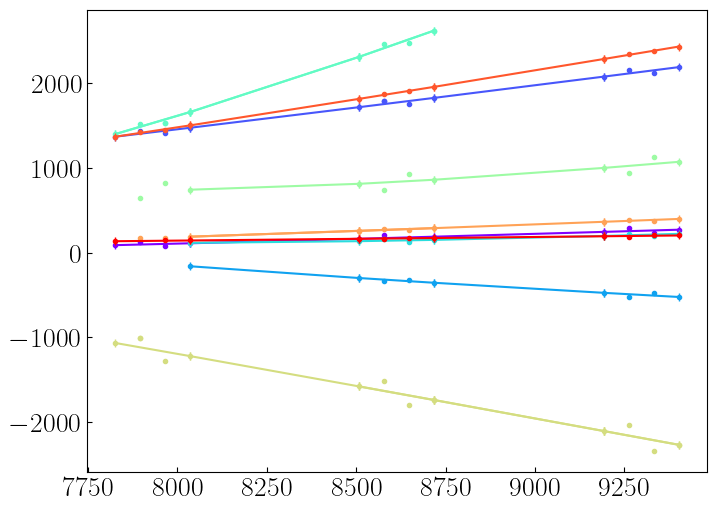

In [111]:
from matplotlib import cm

n_particles = 10

colors = cm.rainbow(np.linspace(0, 1, n_particles))

fig, ax = plt.subplots(figsize=(8, 6))
for particle_id, color in zip(particle_ids[:n_particles], colors):
    df_hits_particle = df_hits_particles[df_hits_particles["particle_id"] == particle_id]
    hit_indices = df_hits_particle["hit_idx"].unique()
    edge_indices_in_particle = edge_index[
        :, array_y
    & np.isin(edge_index[0], hit_indices) & np.isin(edge_index[1], hit_indices)
    ]
    print(edge_indices_in_particle.shape)
    ax.plot(
        array_zatyeq0[hit_indices],
        array_xatyeq0[hit_indices],
        marker=".",
        linestyle="",
        color=color,
    )
    for edge in edge_indices_in_particle.T:
        ax.plot(
            (array_zatyeq0[edge[0]], array_zatyeq0[edge[1]]),
            (array_xatyeq0[edge[0]], array_xatyeq0[edge[1]]),
            color=color,
            marker="|",
        )

In [112]:
df_hits_particle

run    event      hit_id  xatyeq0  zatyeq0      dxdy  plane  \
3022  17235291  6617549  1342490105  135.940   7826.1 -0.000000      0   
3023  17235291  6617549  1342621135  147.010   7966.1 -0.087489      2   
3024  17235291  6617549  1342685736  144.565   8035.9 -0.000000      3   
3025  17235291  6617549  1342752135  164.785   8508.1 -0.000000      4   
3026  17235291  6617549  1342816873  161.787   8577.9  0.087489      5   
3027  17235291  6617549  1342883160  177.577   8648.1 -0.087489      6   
3028  17235291  6617549  1342947994  173.765   8717.9 -0.000000      7   
3029  17235291  6617549  1343014163  194.485   9193.1 -0.000000      8   
3030  17235291  6617549  1343079132  191.349   9262.9  0.087489      9   
3031  17235291  6617549  1343145189  207.139   9333.1 -0.087489     10   
3032  17235291  6617549  1343210255  203.840   9402.9 -0.000000     11   

               event_id  particle_id    pid  nhits_velo has_scifi  hit_idx  
3022  17235291006617549         8110  211.0         4.0      True       62  
3023  17235291006617549         8110  211.0         4.0      True      894  
3024  17235291006617549         8110  211.0         4.0      True     1074  
3025  17235291006617549         8110  211.0         4.0      True     1309  
3026  17235291006617549         8110  211.0         4.0      True     1943  
3027  17235291006617549         8110  211.0         4.0      True     2078  
3028  17235291006617549         8110  211.0         4.0      True     2495  
3029  17235291006617549         8110  211.0         4.0      True     2691  
3030  17235291006617549         8110  211.0         4.0      True     3348  
3031  17235291006617549         8110  211.0         4.0      True     3779  
3032  17235291006617549         8110  211.0         4.0      True     3987

(array([  4.,   9.,  21.,  18.,  14., 205.,  18.,   6.,   2.,   2.]),
 array([ 5. ,  6.2,  7.4,  8.6,  9.8, 11. , 12.2, 13.4, 14.6, 15.8, 17. ]),
 <BarContainer object of 10 artists>)

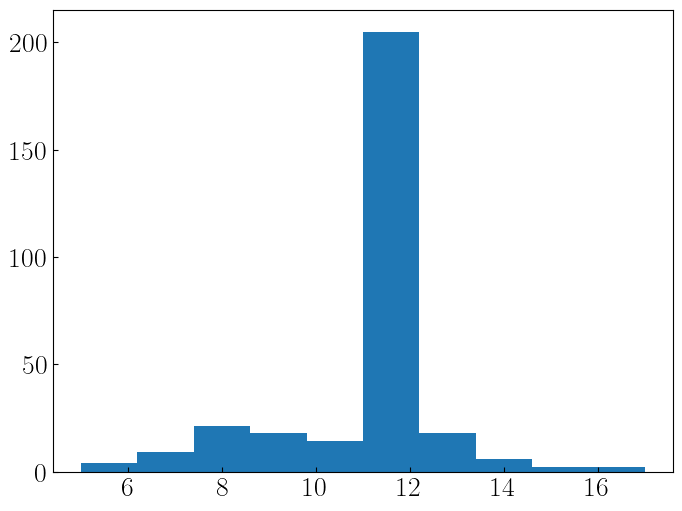

In [113]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df_particles["nhits_scifi"])

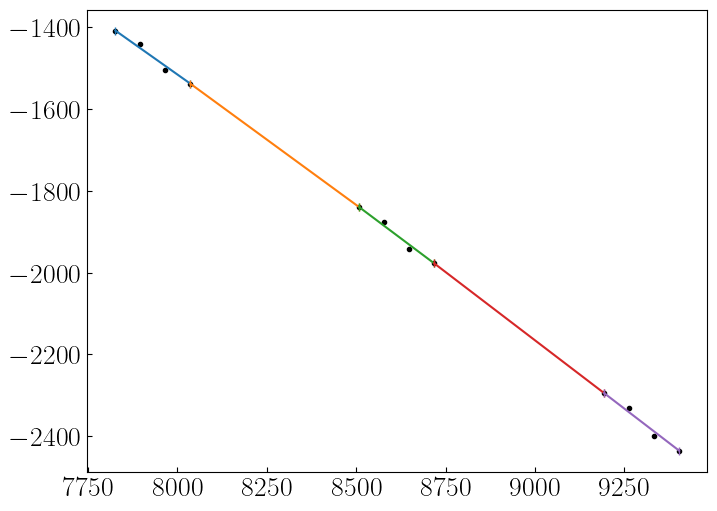

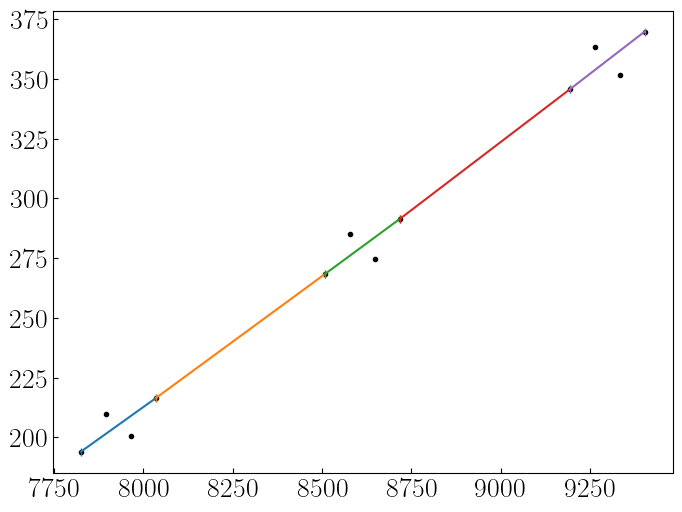

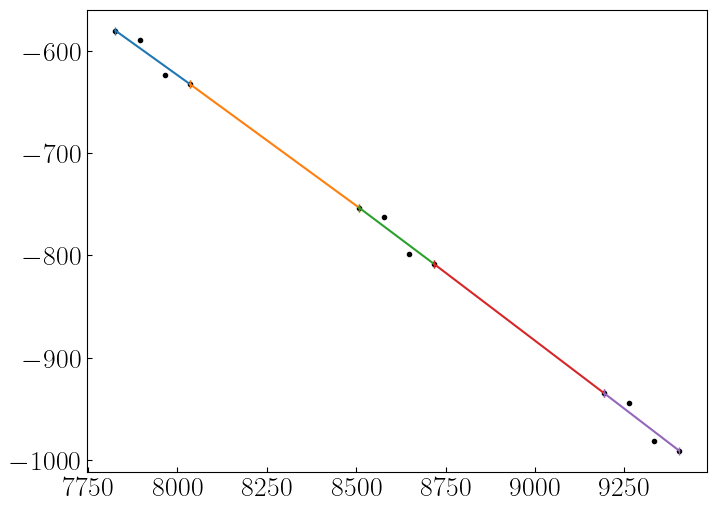

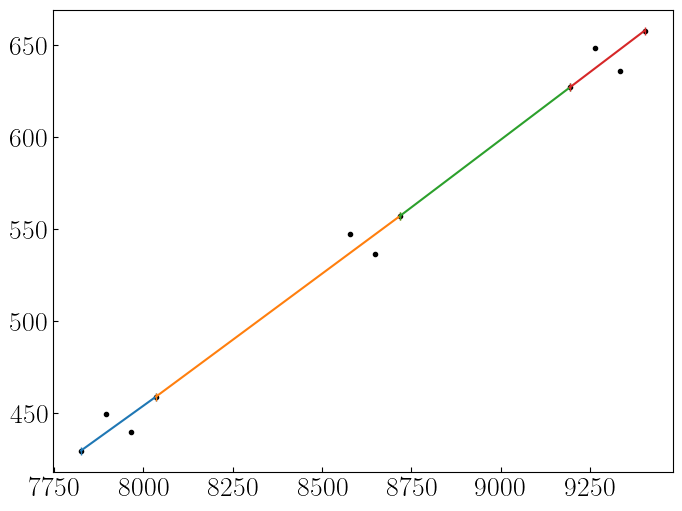

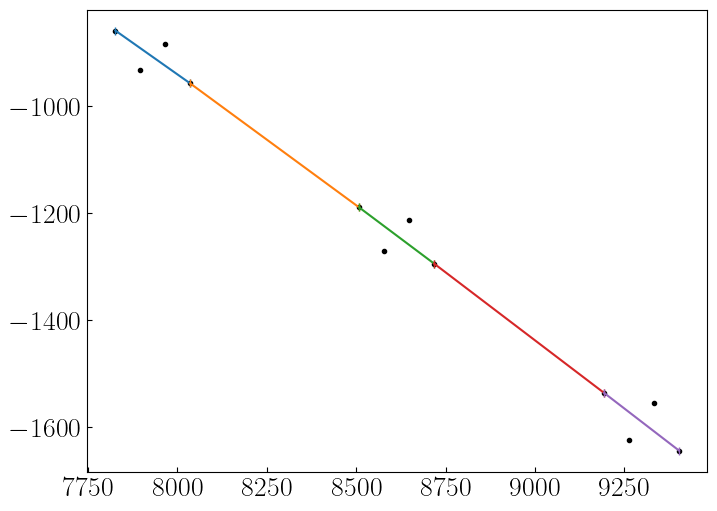

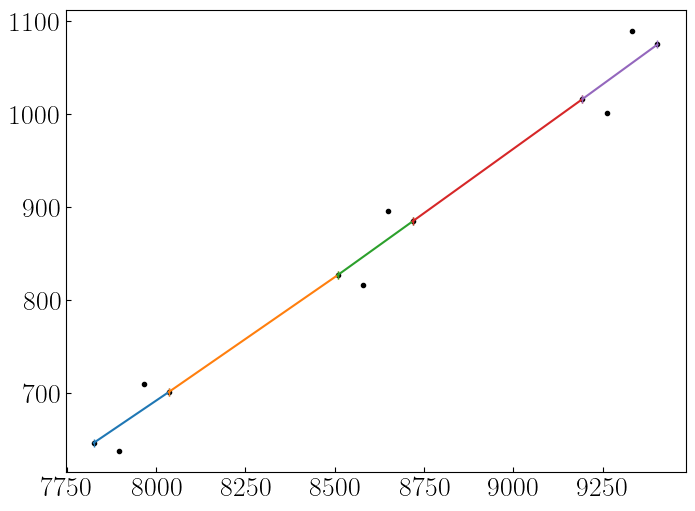

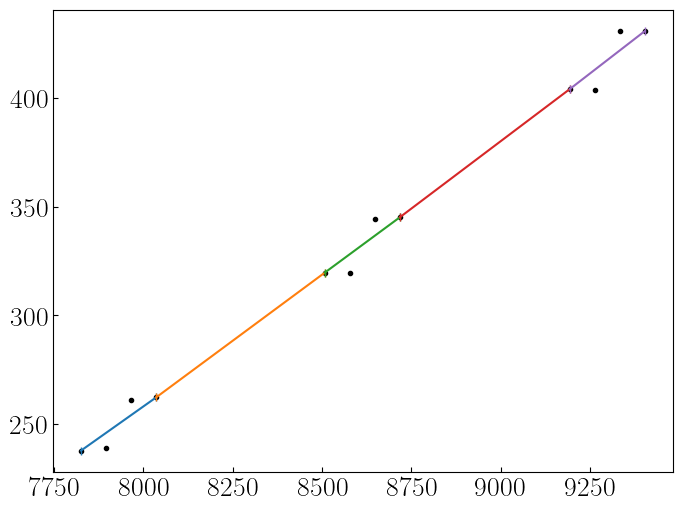

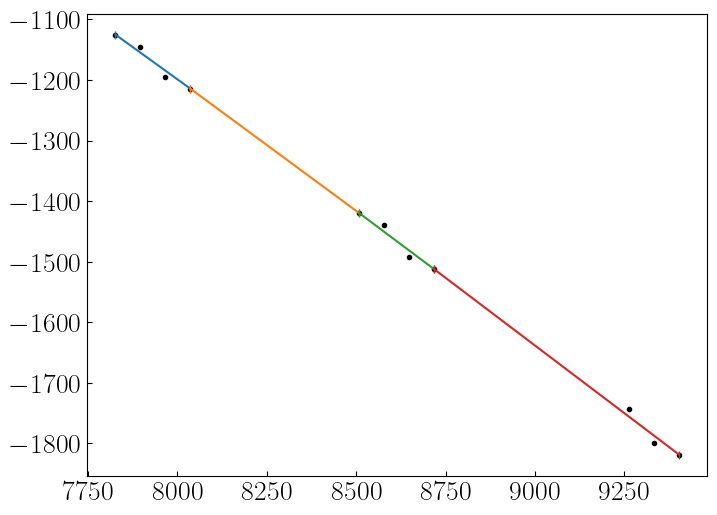

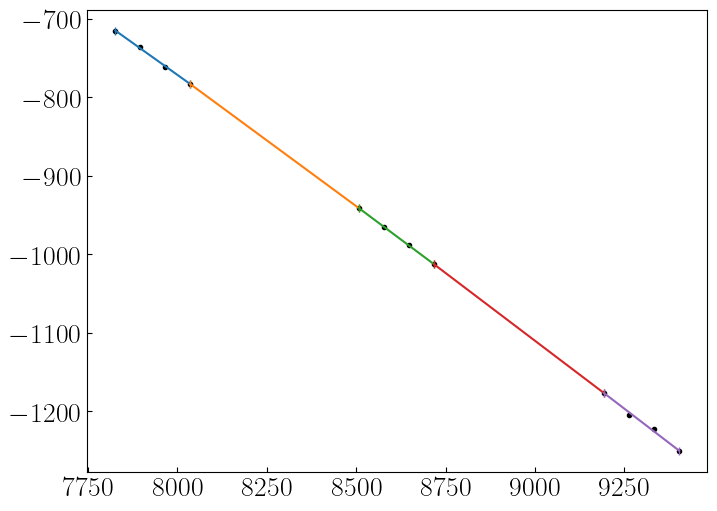

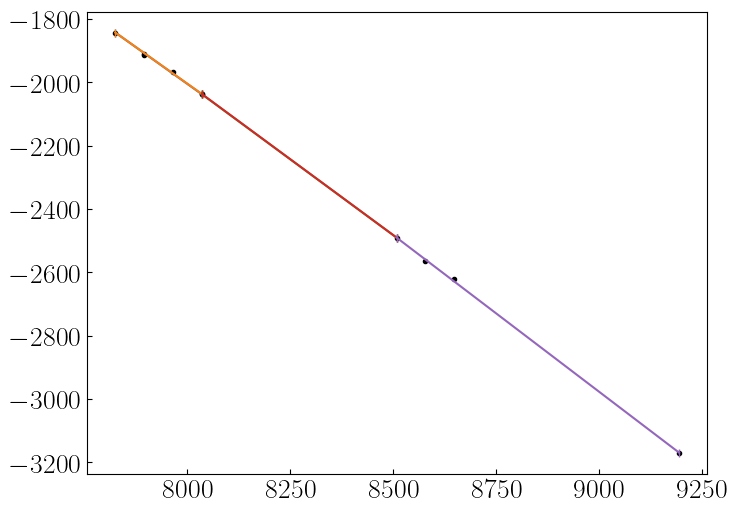

In [116]:
particle_ids =  df_particles[(df_particles["particle_id"] != 0) & (df_particles["nhits_scifi"] ><7
                                                                  )]["particle_id"].unique()
for particle_id in particle_ids[:10]:
    fig, ax = plt.subplots(figsize=(8, 6))
    df_hits_particle = df_hits_particles[df_hits_particles["particle_id"] == particle_id]
    hit_indices = df_hits_particle["hit_idx"].unique()
    edge_indices_in_particle = edge_index[
        :, array_y
    & np.isin(edge_index[0], hit_indices) & np.isin(edge_index[1], hit_indices)
    ]
    ax.plot(
        array_zatyeq0[hit_indices],
        array_xatyeq0[hit_indices],
        marker=".",
        linestyle="",
        color="k",
    )
    for edge in edge_indices_in_particle.T:
        ax.plot(
            (array_zatyeq0[edge[0]], array_zatyeq0[edge[1]]),
            (array_xatyeq0[edge[0]], array_xatyeq0[edge[1]]),
            marker="|",
        )

In [115]:
df_particles[(df_particles["particle_id"] != 0) & (df_particles["nhits_scifi"] > 16)]["pid"]

50494   -11
Name: pid, dtype: int64